In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
data=pd.read_csv('cardio_train.csv',sep=";")
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [79]:
#Features:

#Age | Objective Feature | age | int (days)
#Height | Objective Feature | height | int (cm) |
#Weight | Objective Feature | weight | float (kg) |
#Gender | Objective Feature | gender | categorical code |
#Systolic blood pressure | Examination Feature | ap_hi | int |
#Diastolic blood pressure | Examination Feature | ap_lo | int |
#Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
#Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
#Smoking | Subjective Feature | smoke | binary |
#Alcohol intake | Subjective Feature | alco | binary |
#Physical activity | Subjective Feature | active | binary |
#Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [81]:
data['age']=data['age']/365

In [82]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [83]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [84]:
column=["id","cardio"]
x=data.drop(column,axis=1)
y=data["cardio"]
y=y.astype(int)



In [85]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50.391781,2,168,62.0,110,80,1,1,0,0,1
1,55.419178,1,156,85.0,140,90,3,1,0,0,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0
3,48.282192,2,169,82.0,150,100,1,1,0,0,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0


In [86]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int32

In [87]:
#dividing age groups into 4 age groups

In [88]:
bins = np.linspace(min(data["age"]), max(data["age"]), 5)
bins

array([29.58356164, 38.42945205, 47.27534247, 56.12123288, 64.96712329])

In [89]:
group_names = ['Young Adult', 'Adult', 'Middle Age', 'Old']

In [90]:
df1=data

In [91]:
df1['age-binned'] = pd.cut(df1['age'], bins, labels=group_names, include_lowest=True )
df1[['age','age-binned']].head(10)

,age,age-binned
0,50.391781,Middle Age
1,55.419178,Middle Age
2,51.663014,Middle Age
3,48.282192,Middle Age
4,47.873973,Middle Age
5,60.038356,Old
6,60.583562,Old
7,61.873973,Old
8,48.405479,Middle Age
9,54.339726,Middle Age


In [92]:
df1["age-binned"].value_counts()

Middle Age     29528
Old            26396
Adult          14072
Young Adult        4
Name: age-binned, dtype: int64

Text(0.5, 1.0, 'age distribution')

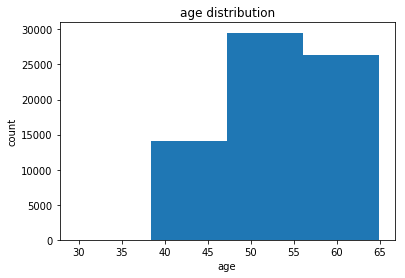

In [93]:
a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.hist(df1["age"], bins = 4)

# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("age distribution")

In [94]:
#relation between various factors and the possibility of disease

Text(0, 0.5, 'weight')

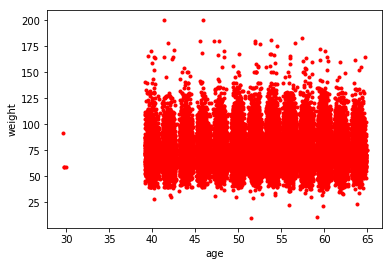

In [95]:
plt.scatter(data['age'],data['weight'],marker='.',color='red')

plt.xlabel('age')
plt.ylabel('weight')

Text(0, 0.5, 'weight')

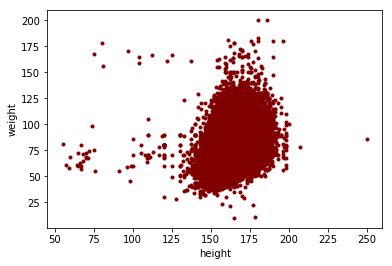

In [96]:
plt.scatter(data['height'],data['weight'],marker='.',color='maroon')

plt.xlabel('height')
plt.ylabel('weight')

# Some statistics

In [97]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age-binned
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,Middle Age
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,Middle Age
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,Middle Age
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,Middle Age
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,Middle Age


In [98]:
mask1=data['cardio']==1

In [99]:
cardio1=data[mask1]

In [100]:
cardio1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34979 entries, 1 to 69998
Data columns (total 14 columns):
id             34979 non-null int64
age            34979 non-null float64
gender         34979 non-null int64
height         34979 non-null int64
weight         34979 non-null float64
ap_hi          34979 non-null int64
ap_lo          34979 non-null int64
cholesterol    34979 non-null int64
gluc           34979 non-null int64
smoke          34979 non-null int64
alco           34979 non-null int64
active         34979 non-null int64
cardio         34979 non-null int64
age-binned     34979 non-null category
dtypes: category(1), float64(2), int64(11)
memory usage: 3.8 MB


In [101]:
height_avg=(cardio1['height'].sum()/34979)/100

In [102]:
weight_avg=cardio1['weight'].sum()/34979

In [103]:
bmi_avg=weight_avg/(height_avg**2)

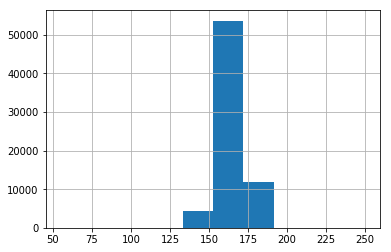

In [104]:
data['height'].hist()

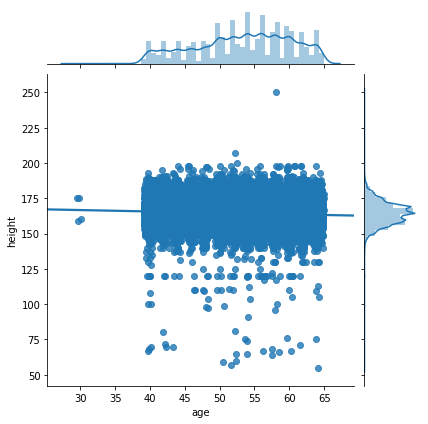

In [105]:
sns.jointplot("age", "height", data=data, kind="reg")

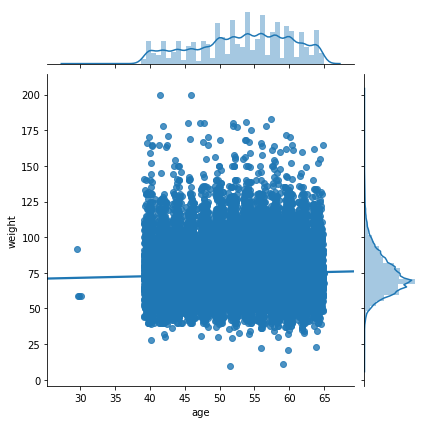

In [106]:
sns.jointplot("age", "weight", data=data, kind="reg")

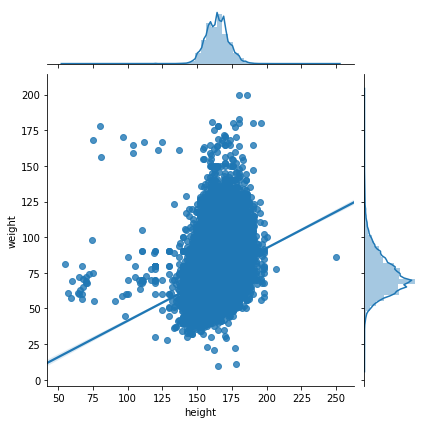

In [107]:
sns.jointplot("height", "weight", data=data, kind="reg")

In [108]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=7)

In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=7,max_depth=10)
classifier.fit(train_x,train_y)
y_pred_RF = classifier.predict(test_x)


In [110]:
from sklearn.metrics import accuracy_score

In [111]:
a = accuracy_score(test_y,y_pred_RF)

In [112]:
a

0.7358285714285714

In [113]:
classifier.score(x,y)

0.7509571428571429

In [114]:
pred=classifier.predict([[19,1,173,56,150,100,1,1,0,0,1]])

In [115]:
pred

array([1])

# Actual Computation




In [161]:
data_age=19   #age of person in years

In [162]:
data_gender=2#gender of person 1 - women, 2 - men

In [163]:
data_height=178 #height of person in cm

In [164]:
data_weight=70 #weight of a person in kg

In [165]:
data_sys=120 #systolic blood pressure of person

In [166]:
data_dia=70 #diastolic blood pressure of person

In [167]:
data_cho= 1 # cholestrol levels  1: normal, 2: above normal, 3: well above normal

In [168]:
data_glu=1 #blood glucose levels 1: normal, 2: above normal, 3: well above 

In [169]:
data_smoke=0 #whether patient smokes or not 1= smoke , 0=non smoker

In [170]:
data_alco=0 #whether person is alcoholic or not 1= YES , 0=NO

In [171]:
data_active=1 # whether person is engaged in regular sports or exercise

In [172]:
res=classifier.predict([[data_age,data_gender,data_height,data_weight,data_sys,data_dia,data_cho,data_glu,data_smoke,data_alco,data_active]])

In [173]:
value=res[0]

In [174]:
bmi= data_weight/((data_height/100)**2)

In [175]:
if (value==0):
    print('You have low risk of cardiovascular disease')
else: 
    print("You have high risk of cardiovascular disease")
    
print("Your BMI=")
print(bmi)
    
if (bmi<18.5):
    print('You are underweight and you need to work on your diet and take proper foods')
if (bmi>=18.5 and bmi<25):
    print('You are normal , maintain your healthy life style always')
if (bmi>=25 and bmi<30):
    print('You are a bit overweight and need to make changes to your life style')
if (bmi>=30 and bmi<35):
    print('You are obese and need to loose weight')
if (bmi>=35):
    print('You living extremely unhealthily and need to change yourself immediately')


You have low risk of cardiovascular disease
Your BMI=
22.093170054286073
You are normal , maintain your healthy life style always
